- 00시 / 05시 / 17시 휴게
- 6월 23일 11시
- 6월 27일 17~18시 X

In [1]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [29]:
import dask.dataframe as dd

data_list = []
for filename in os.listdir('mct31_data'):
    if filename in ['mct31_7월2주차.csv', 'mct31_7월3주차.csv', 'mct31_7월4주차.csv']:
        continue
    raw_data = dd.read_csv('mct31_data/' + filename, dtype={'F_RunState': 'object'})
    raw_data['GDatetime'] = dd.to_datetime(raw_data['GDatetime']).dt.round('S')
    raw_data = raw_data.compute()  # Dask DataFrame을 Pandas DataFrame으로 변환
    raw_data = raw_data.set_index('GDatetime')
    raw_data['F_RunState'] = raw_data['F_RunState'].fillna('0')
    raw_data['F_RunState'] = raw_data['F_RunState'].map(lambda x: 1 if x == '작업중' else 2 if x == '작업대기' else 3 if x == '작업정지' else 4 if x == 'STOP' else 5 if x == '알람중' else 0)
    raw_data['F_OperationTime'] = raw_data['F_OperationTime'].fillna(0)
    raw_data['F_CuttingTime'] = raw_data['F_CuttingTime'].fillna(0)
    raw_data['F_ToolNum'] = raw_data['F_ToolNum'].fillna(0)
    raw_data = raw_data.drop(['F_AbsoluteX', 'F_AbsoluteY', 'F_AbsoluteZ', 'F_DistanceX', 'F_DistanceY', 'F_DistanceZ'], axis=1)
    data_list.append(raw_data.iloc[:, :-6])

df1 = data_list[0]
df2 = data_list[1]
df3 = data_list[2]
df4 = data_list[3]
df5 = data_list[4]
df6 = data_list[5]
df7 = data_list[6]
df8 = data_list[7]

data = pd.concat(data_list, axis=0)

# Calculate the shifted differences
diffs = np.diff(data['F_ToolNum'], prepend=data['F_ToolNum'][0])

# Initialize transformed list
transformed = [0]  # starting with 0 as the first value

# Iterate over the differences and build the transformed list
for i in range(1, len(diffs)):
    if diffs[i] == 0:
        transformed.append(transformed[i-1])
    else:
        transformed.append(data['F_ToolNum'][i-1])
data['F_ToolNum'] = transformed

data

,F_RunState,F_OperationTime,F_CuttingTime,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_ADC4,G_MV,G_MA,G_MActP,G_MRActP,G_MPF,G_MFeq,G_MTemp
GDatetime,,,,,,,,,,,,,,,,,,,
2023-05-18 14:38:25,1,431109.0,170253.0,1858,2133.0,7.0,680.0,0.0,32.599998,38.599998,1.0,0.56,216.910004,17.107,4.384,4.152,0.590,59.990002,41.0
2023-05-18 14:38:26,1,431109.0,170253.0,1858,2133.0,7.0,680.0,0.0,32.599998,38.599998,1.0,0.56,216.910004,17.107,4.384,4.152,0.590,59.990002,41.0
2023-05-18 14:38:27,1,431110.0,170254.0,1859,2133.0,7.0,680.0,0.0,32.599998,38.599998,1.0,0.56,216.910004,17.107,4.384,4.152,0.590,59.990002,41.0
2023-05-18 14:38:28,1,431112.0,170255.0,1901,2132.0,4.0,680.0,0.0,32.599998,38.599998,0.0,0.56,216.619995,17.635,4.552,4.180,0.595,59.990002,41.0
2023-05-18 14:38:29,1,431113.0,170256.0,1902,2133.0,7.0,680.0,0.0,32.500000,38.599998,0.0,0.56,216.919998,16.782,4.256,4.140,0.584,59.990002,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03 20:23:20,3,943633.0,802713.0,2441,0.0,0.0,712.0,60.0,37.099998,41.400002,0.0,0.56,221.179993,12.921,2.856,3.848,0.499,60.000000,45.0
2023-07-03 20:23:21,3,943633.0,802713.0,2441,0.0,0.0,712.0,60.0,37.200001,41.500000,0.0,0.56,221.009995,12.897,2.840,3.840,0.498,60.000000,45.0
2023-07-03 20:23:22,3,943633.0,802713.0,2441,0.0,0.0,712.0,60.0,37.099998,41.400002,0.0,0.56,220.679993,12.899,2.844,3.824,0.499,60.000000,45.0


In [3]:
# # Sample data
# data = [1,99,2,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,6,6,6,6]

# # Calculate the shifted differences
# diffs = np.diff(data, prepend=data[0])

# # Initialize transformed list
# transformed = [0]  # starting with 0 as the first value

# # Iterate over the differences and build the transformed list
# for i in range(1, len(diffs)):
#     if diffs[i] == 0:
#         transformed.append(transformed[i-1])
#     else:
#         transformed.append(data[i-1])

# transformed

In [32]:
def highlight_break(ax, sub_df):
    time_ranges_colors = [('00:00:00', '01:00:00', 'red'),
                          ('05:00:00', '06:00:00', 'blue'),
                          ('12:00:00', '13:00:00', 'green'), 
                          ('17:00:00', '18:00:00', 'magenta')]

    # sub_df의 모든 고유한 날짜를 가져옵니다.
    unique_dates = sub_df.index.normalize().unique()

    for start, end, color in time_ranges_colors:
        for date in unique_dates:
            # 각 날짜와 시간대를 결합하여 시작 및 종료 시간을 생성합니다.
            start_time = pd.Timestamp(date.strftime('%Y-%m-%d') + ' ' + start)
            end_time = pd.Timestamp(date.strftime('%Y-%m-%d') + ' ' + end)

            ax.fill_between(sub_df.index, 
                            ax.get_ylim()[0], ax.get_ylim()[1], 
                            where=(sub_df.index >= start_time) & (sub_df.index <= end_time), 
                            color=color, alpha=0.3)

def simple_plot(data, date=None, col=None):
    start_time = time.time()
    plt.figure(figsize=(20, len(col)*2))

    # col이 None인 경우 모든 열을 선택
    if col is None:
        col = data.columns

    if isinstance(date, tuple):
        tmp = data.loc[date[0]:date[1], col]
    
        for i, column in enumerate(tmp.columns):
            ax = plt.subplot(len(tmp.columns), 1, i + 1)
            plt.plot(tmp[column])
            highlight_break(ax, tmp)

            for x_position in data.loc[date[0]:date[1]][data['F_RunState'] == 2].index:
                plt.axvline(x=x_position, color='r')
            plt.title(column)    
    
    else:
        tmp = data.loc[date][col]

        for i, column in enumerate(tmp.columns):
            ax = plt.subplot(len(tmp.columns), 1, i + 1)
            plt.plot(tmp[column])
            highlight_break(ax, tmp)

            for x_position in data.loc[date][data['F_RunState'] == 2].index:
                plt.axvline(x=x_position, color='r')
            plt.title(column)    
        
    plt.tight_layout()
    plt.show()

    end_time = time.time()
    print('소요 시간 :', end_time - start_time)

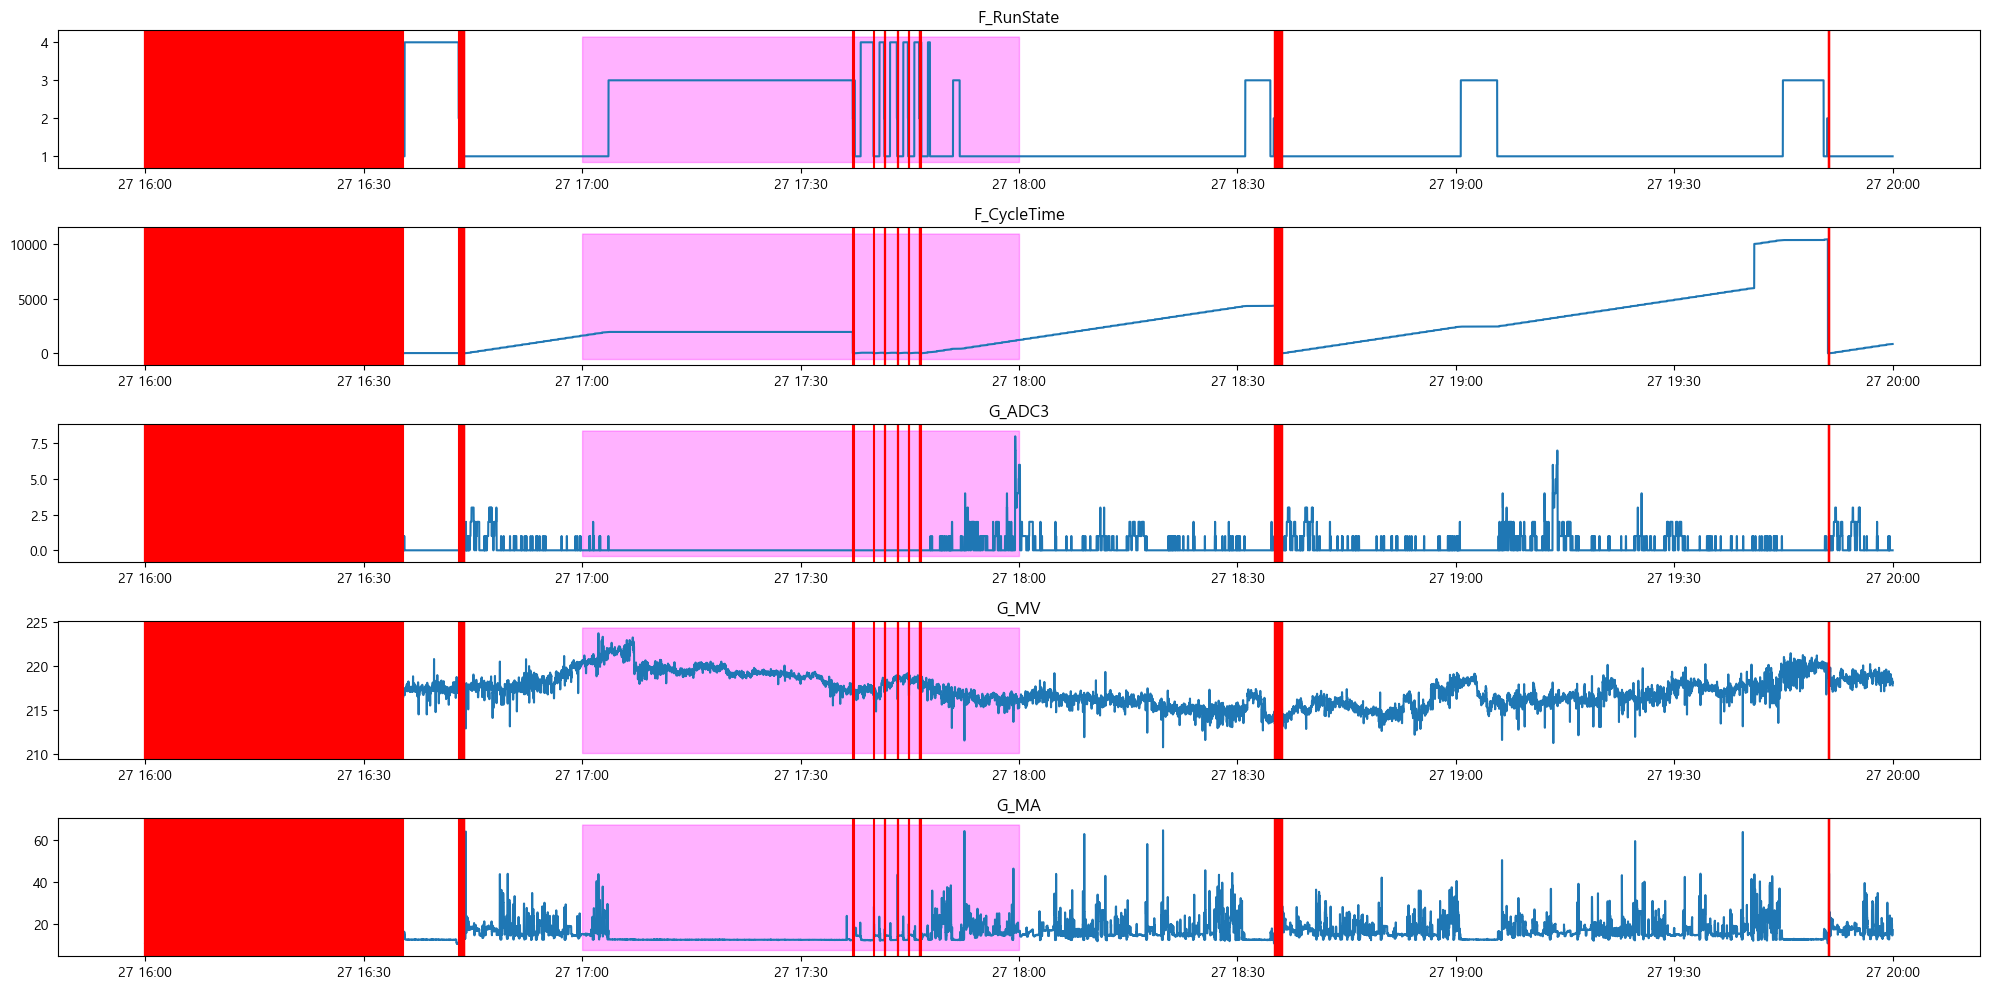

소요 시간 : 9.053316116333008


In [41]:
simple_plot(data, ('2023-06-27 16', '2023-06-27 19'), ['F_RunState', 'F_CycleTime', 'G_ADC3', 'G_MV', 'G_MA'])

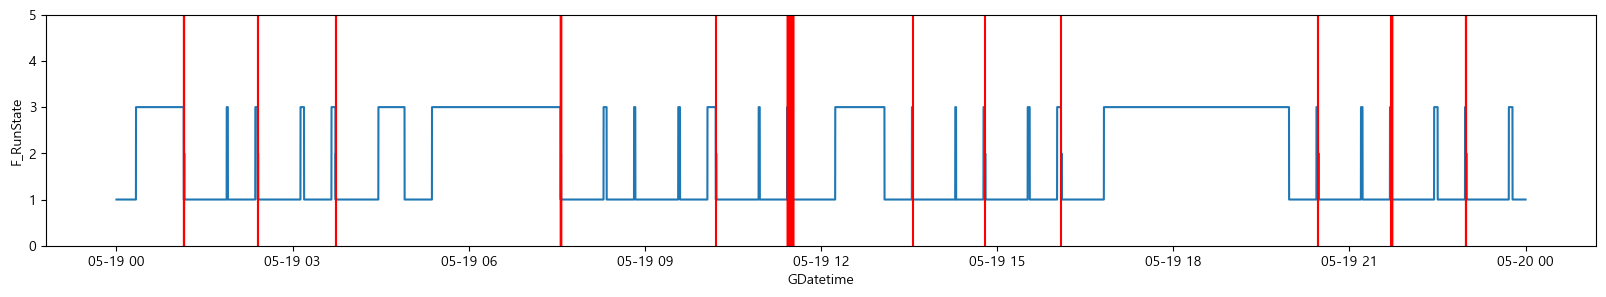

In [8]:
tmp = data.loc['2023-05-19']['F_RunState']
plt.figure(figsize=(20,3))
sns.lineplot(tmp)
for x_position in tmp[tmp == 2].index:
    plt.axvline(x=x_position, color='r')
plt.yticks(range(6))
plt.show()

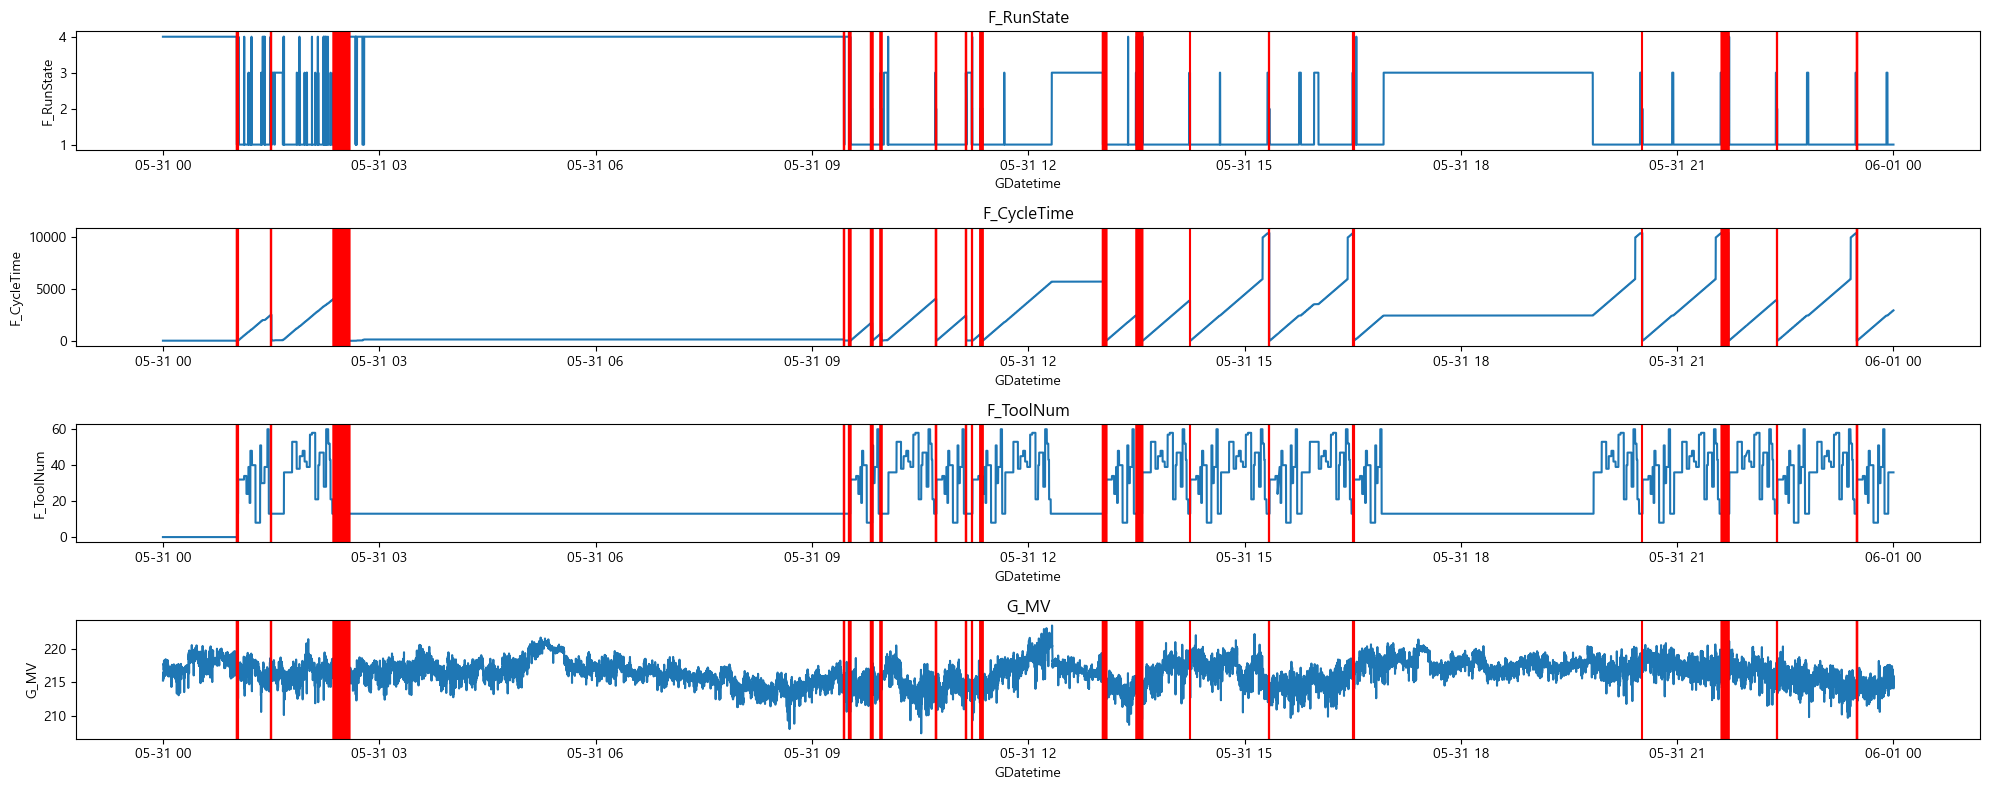

In [18]:
tmp = data.loc['2023-05-31'][['F_RunState', 'F_CycleTime', 'F_ToolNum', 'G_MV']]
plt.figure(figsize=(20, 8))
for i, column in enumerate(tmp.columns):
    plt.subplot(4, 1, i+1)
    sns.lineplot(tmp[column])
    for x_position in tmp[tmp['F_RunState'] == 2].index:
        plt.axvline(x=x_position, color='r')
    plt.title(column)
plt.tight_layout()
plt.show()

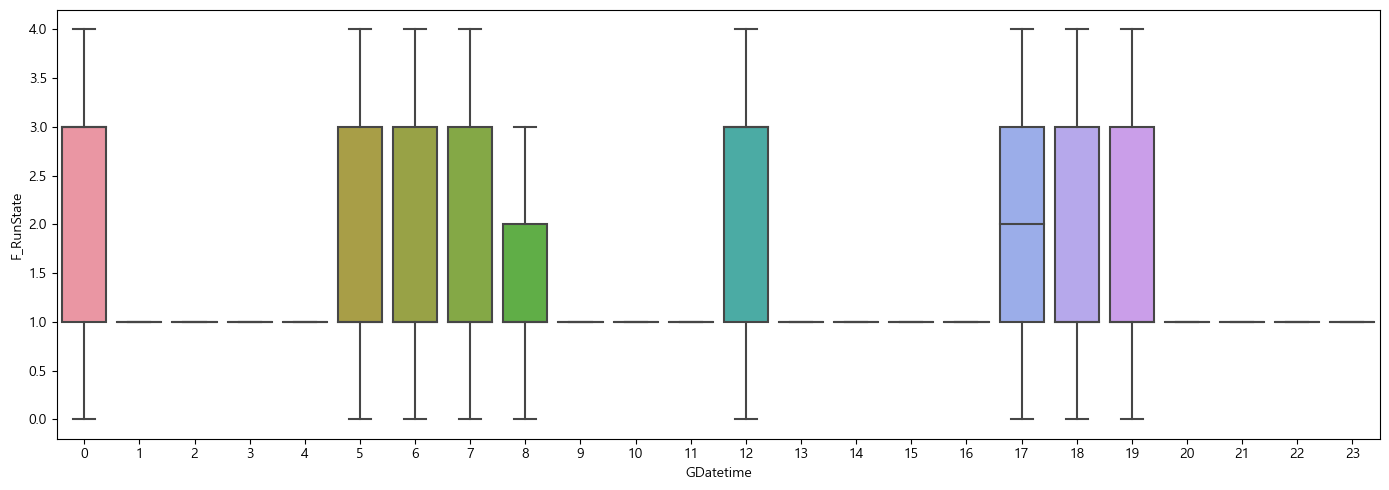

소요 시간 : 1.4694960117340088


In [36]:
start_time = time.time()

plt.figure(figsize=(14, 5))
sns.boxplot(x=data.index.hour.astype('str'), y=data['F_RunState'], order=[str(i) for i in range(24)], showfliers=False)
plt.tight_layout()
plt.show()

end_time = time.time()
print('소요 시간 :', end_time - start_time)

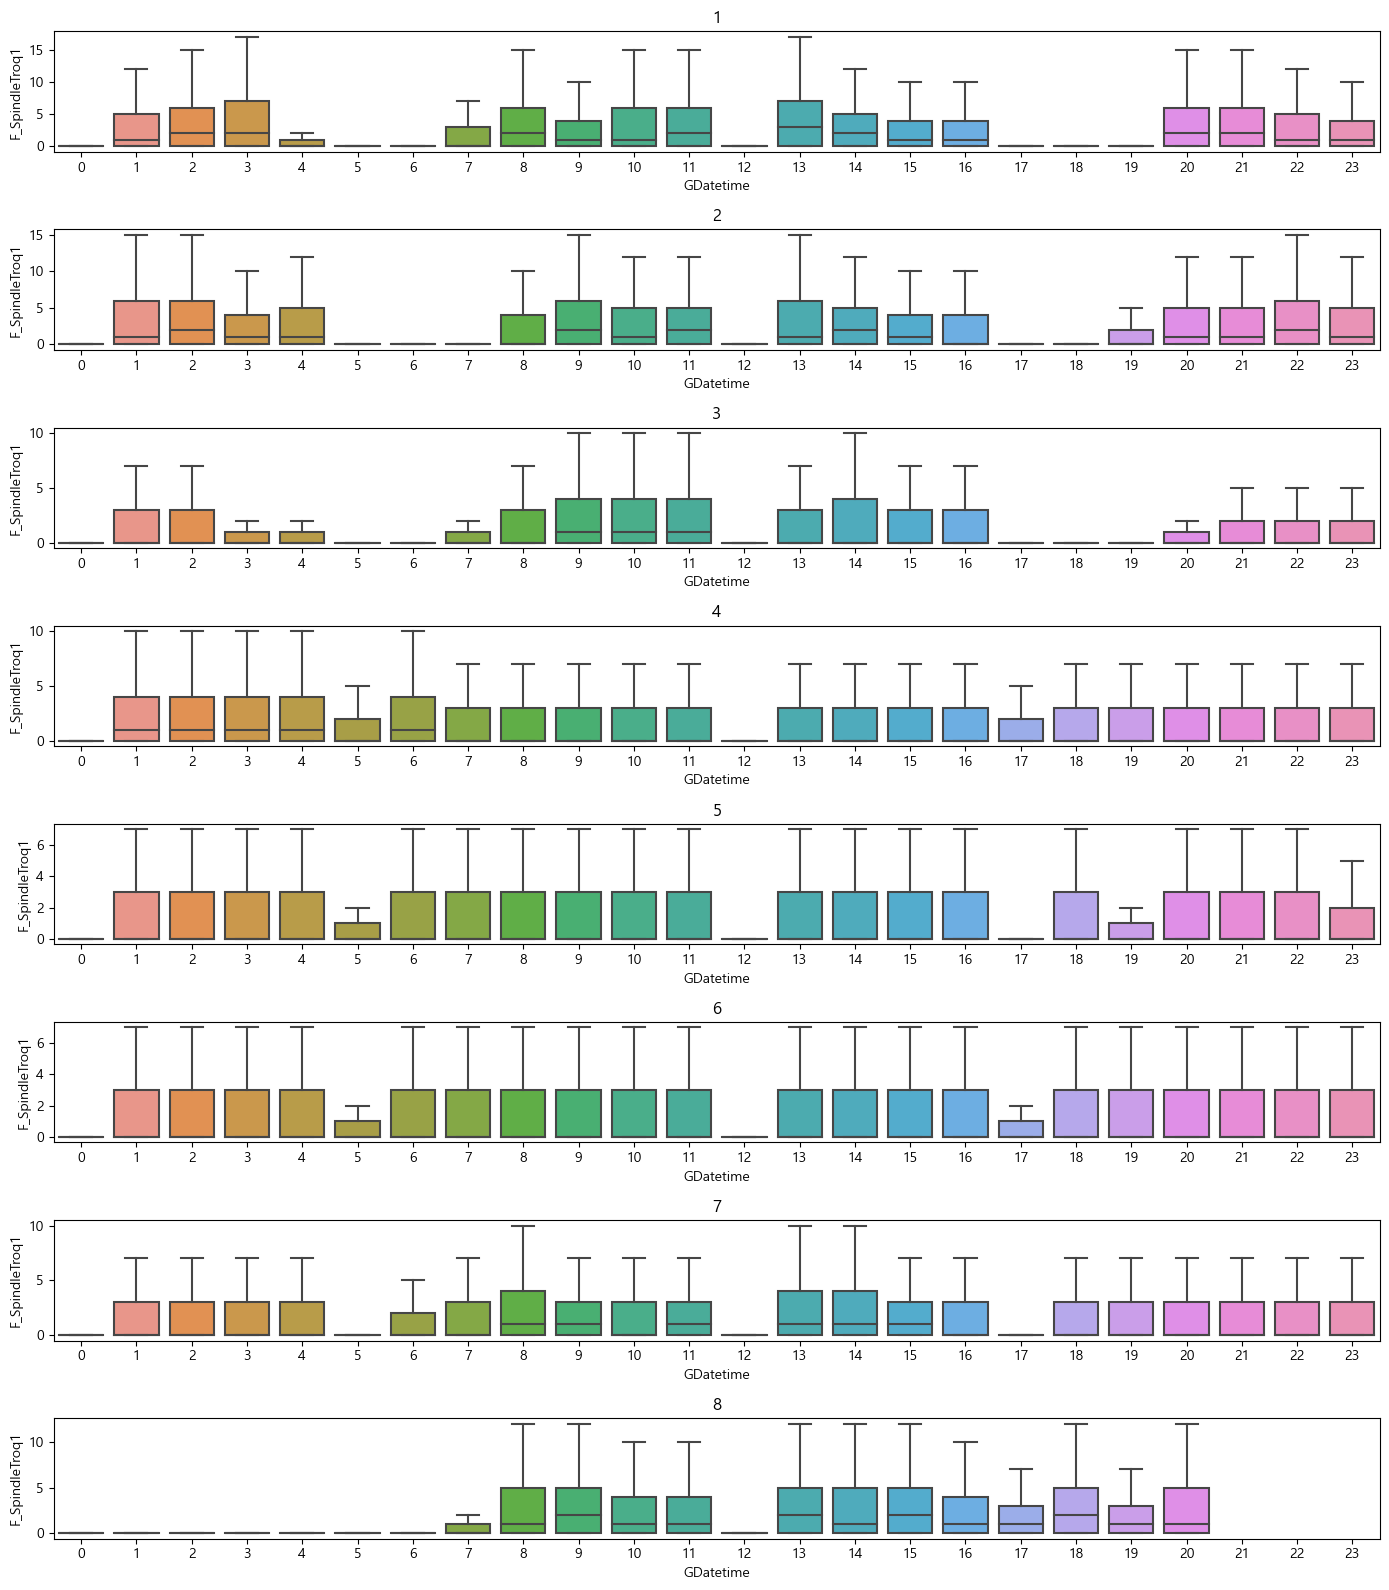

소요 시간 : 2.2405107021331787


In [15]:
start_time = time.time()

plt.figure(figsize=(14, 16))
for i, df in enumerate(data_list):
    plt.subplot(len(data_list), 1, i+1)
    sns.boxplot(x=df.index.hour.astype('str'), y=df['F_SpindleTroq1'], order=[str(i) for i in range(24)], showfliers=False)
    plt.title(i+1)
plt.tight_layout()
plt.show()

end_time = time.time()
print('소요 시간 :', end_time - start_time)

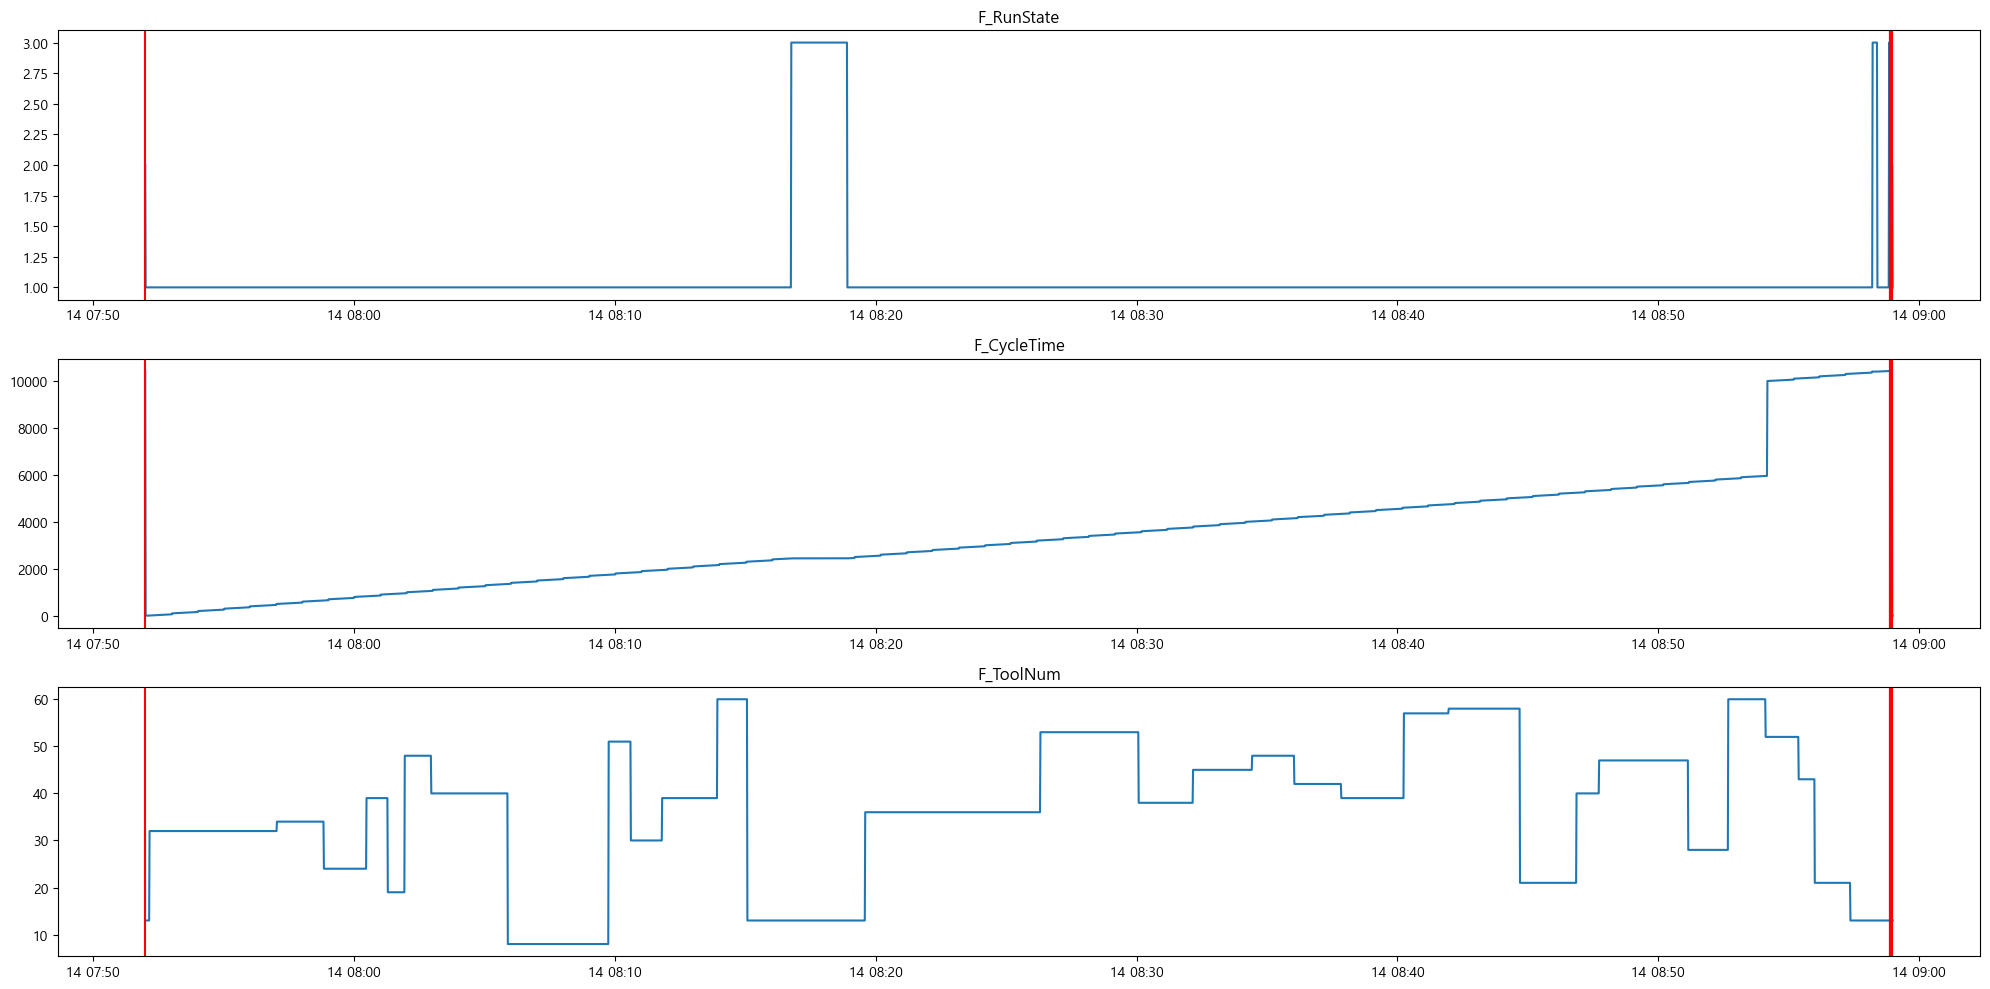

소요 시간 : 0.41401028633117676


In [63]:
start_time = time.time()

tmp = df5.loc['2023-06-14 07:52':'2023-06-14 08:58'][['F_RunState', 'F_CycleTime', 'F_ToolNum']]
plt.figure(figsize=(20,10))

for i, column in enumerate(tmp.columns):
    plt.subplot(len(tmp.columns), 1, i + 1)
    plt.plot(tmp[column])

    # 날짜별로 그룹화하여 각 날짜에 대해 시간 범위 적용
    tmp.groupby(tmp.index.date).apply(highlight_periods)
    # tmp.groupby(tmp.index.date).apply(highlight_runstate)  # 이 부분을 추가
    for x_position in tmp[tmp['F_RunState'] == 2].index:
        plt.axvline(x=x_position, color='r')
    
    plt.title(column)
    
plt.tight_layout()
plt.show()

end_time = time.time()
print('소요 시간 :', end_time - start_time)

In [68]:
df5.loc['2023-06-14 07:52':'2023-06-14 08:58']['F_ToolNum']

GDatetime
2023-06-14 07:52:00    13.0
2023-06-14 07:52:01    13.0
2023-06-14 07:52:02    13.0
2023-06-14 07:52:03    13.0
2023-06-14 07:52:04    13.0
                       ... 
2023-06-14 08:58:55    13.0
2023-06-14 08:58:56    13.0
2023-06-14 08:58:57    13.0
2023-06-14 08:58:58    13.0
2023-06-14 08:58:59    13.0
Name: F_ToolNum, Length: 4001, dtype: float64

<Axes: xlabel='GDatetime'>

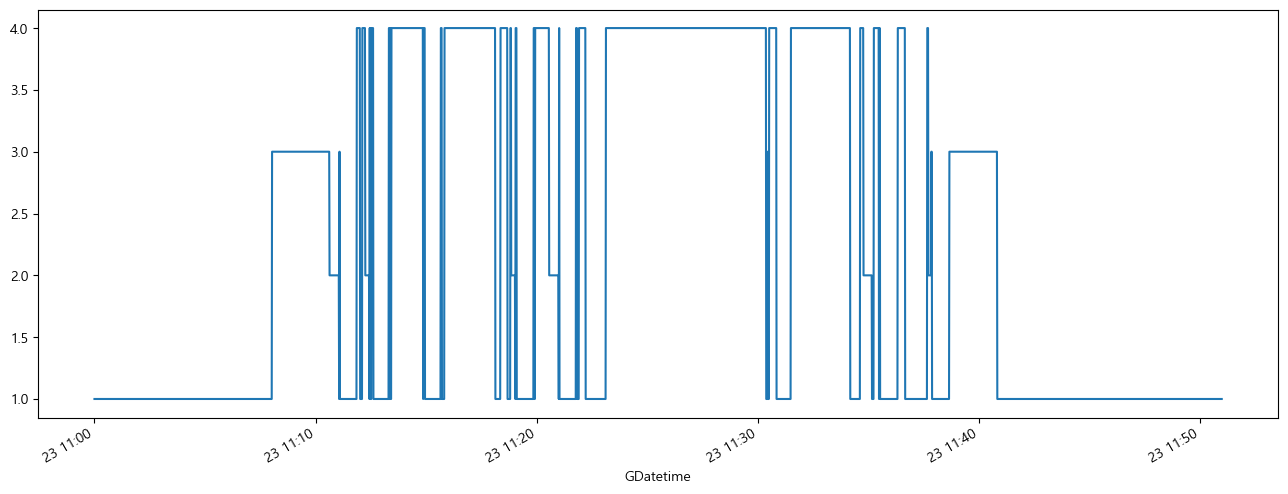

In [10]:
data.loc['2023-06-23 11':'2023-06-23 11:50']['F_RunState'].plot(figsize=(16,6))

<Axes: xlabel='GDatetime'>

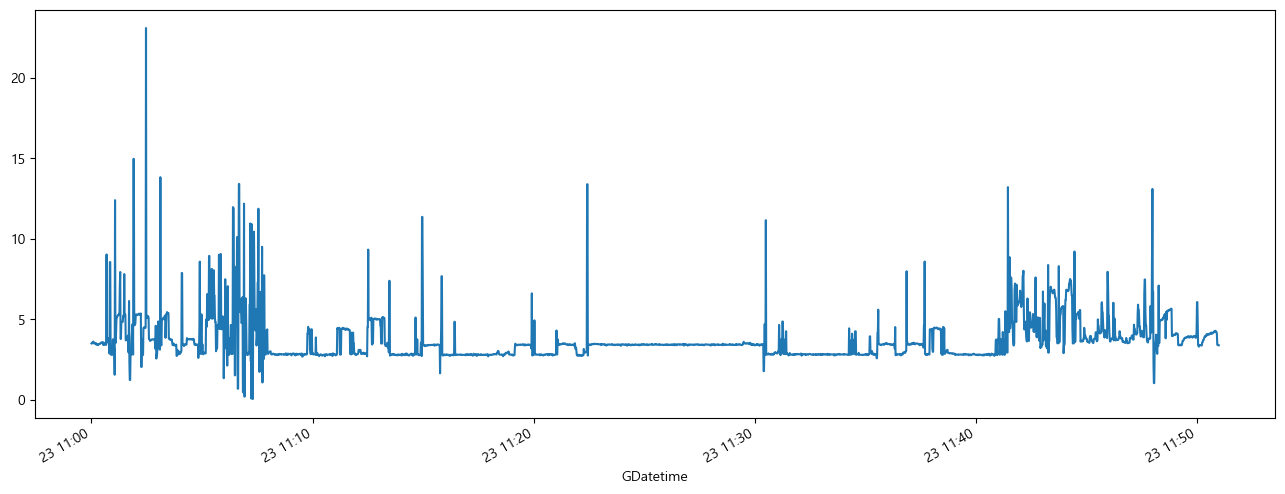

In [17]:
data.loc['2023-06-23 11':'2023-06-23 11:50']['G_MActP'].plot(figsize=(16,6))

In [9]:
# 연속된 0 값들에 대해 그룹화
run_wait = 2
data['group'] = ((data['F_RunState'] == run_wait) != (data['F_RunState'].shift() == run_wait )).cumsum()

# 각 그룹에 대한 카운트
counts = data.groupby('group')['F_RunState'].sum()

# 1분 (60초) 이상 지속되는 구간만 선택
term = 10000
long_zeros = counts[counts >= term].index

# 결과 출력
for i, group in enumerate(long_zeros):
    times = data[data['group'] == group].index
    start_time = times[0]
    end_time = times[-1]
    print(f"{run_wait} 값이 {term//60}분 이상 지속되는 구간 {i+1}개: {start_time} ~ {end_time}")

2 값이 166분 이상 지속되는 구간 1개: 2023-05-18 15:52:00 ~ 2023-05-18 22:47:26
2 값이 166분 이상 지속되는 구간 2개: 2023-05-18 22:47:38 ~ 2023-05-19 01:09:10
2 값이 166분 이상 지속되는 구간 3개: 2023-05-19 03:44:15 ~ 2023-05-19 07:34:10
2 값이 166분 이상 지속되는 구간 4개: 2023-05-19 07:34:21 ~ 2023-05-19 10:12:49
2 값이 166분 이상 지속되는 구간 5개: 2023-05-19 11:31:08 ~ 2023-05-19 13:33:47
2 값이 166분 이상 지속되는 구간 6개: 2023-05-19 16:05:42 ~ 2023-05-19 20:28:20
2 값이 166분 이상 지속되는 구간 7개: 2023-05-19 22:59:29 ~ 2023-05-20 01:09:07
2 값이 166분 이상 지속되는 구간 8개: 2023-05-20 04:44:07 ~ 2023-05-20 06:37:38
2 값이 166분 이상 지속되는 구간 9개: 2023-05-22 07:04:27 ~ 2023-05-22 08:20:23
2 값이 166분 이상 지속되는 구간 10개: 2023-05-22 10:58:35 ~ 2023-05-22 14:24:53
2 값이 166분 이상 지속되는 구간 11개: 2023-05-22 15:59:25 ~ 2023-05-22 20:11:43
2 값이 166분 이상 지속되는 구간 12개: 2023-05-22 22:55:17 ~ 2023-05-23 01:04:49
2 값이 166분 이상 지속되는 구간 13개: 2023-05-23 02:25:05 ~ 2023-05-23 07:57:11
2 값이 166분 이상 지속되는 구간 14개: 2023-05-23 11:44:34 ~ 2023-05-23 13:44:20
2 값이 166분 이상 지속되는 구간 15개: 2023-05-23 16:36:57 ~ 2023-05-2